# <center> EDA Ecommerce Shipping Dataset </center>

<b> Rakamin Academy DS Batch 26 </b> <br>
<b> Final Project Group 3 Asklepios </b>

<b> Nama:  </b> <br>
<b> Awalsyah Rinanto Putra </b> <br>
<b> Fathah Oscar </b> <br>
<b> M Rizky Septiansyah </b> <br>
<b> Hermawan Febrianto </b> <br>
<b> Devi Puji </b> <br>
<b> Anggita Citanegara Lubis <b>


## Exploratory Data Analysis (EDA)
    proses analisis untuk memahami karakteristik data, dan hal-hal yang perlu kita lakukan agar data tersebut dapat digunakan untuk proses pembelajaran model.

# 1. About Dataset

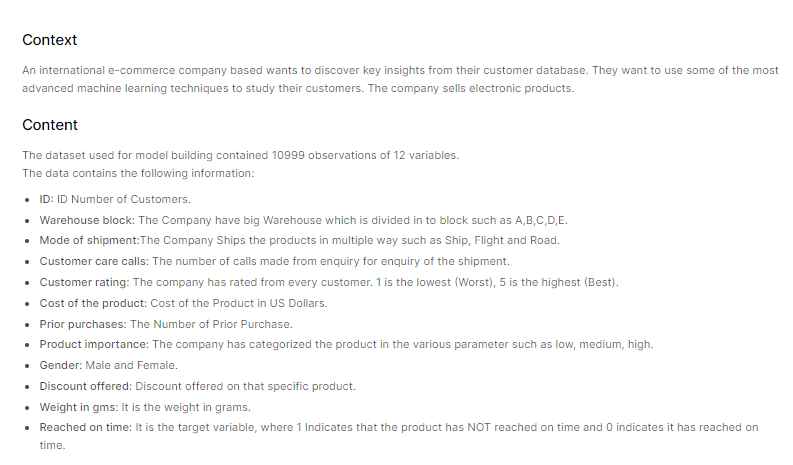

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()

print('Numpy version: ',np.__version__)
print('Pandas version: ',pd.__version__)
print('Seaborn version: ',sns.__version__)

Numpy version:  1.21.5
Pandas version:  1.4.2
Seaborn version:  0.11.2


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# 2. Load Dataset

In [3]:
df_ecommerce = pd.read_csv('E-Commerce.csv')
df_ecommerce

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [5]:
df_ecommerce.shape

(10999, 12)

dataset ecommerce ini memiliki 10999 baris dan 12 kolom dengan rincian kolom id sebagai index dan kolom Reached.on.Time_Y.N sebagai target <br>
Sementara itu, kolom lain menjadi feature.

# 3. Descriptive Analysis

## A. Cek NULL Values Dan Tipe Data

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek missing values (nilai yang kosong), duplikat dan tipe data pada tiap kolom. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [6]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df_ecommerce.duplicated().any()

False

In [8]:
print("Duplicated values:", df_ecommerce.duplicated().any().sum())
print("Missing values:", df_ecommerce.isna().sum().sum())
print("Categorical columns:", len(df_ecommerce.select_dtypes('object').columns))
print("Numerical columns:", len(df_ecommerce.select_dtypes('number').columns))

Duplicated values: 0
Missing values: 0
Categorical columns: 4
Numerical columns: 8


Dari info di atas, disimpulkan bahwa semua kolom: <br>
1. Tidak terdapat kolom yang bernilai Null/Kosong<br>
2. Tidak terdapat baris yang terduplikat<br>
3. Seluruh kolom memiliki tipedata yang sesuai

## B. Sampling

memahami data dengan `df.sample()`

In [9]:
df_ecommerce.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5284,5285,C,Ship,7,4,305,4,medium,F,6,1873,0
386,387,A,Road,3,1,251,3,medium,M,42,3698,1
8456,8457,A,Ship,3,5,124,2,medium,M,1,5709,1
2487,2488,B,Ship,5,2,132,2,medium,M,8,1665,1
4736,4737,A,Ship,4,4,245,2,low,M,6,5772,0
10516,10517,C,Ship,3,4,154,2,high,F,2,4998,0
8716,8717,C,Ship,5,5,198,3,low,F,5,4754,1
7094,7095,A,Ship,3,2,182,10,low,M,1,4303,0
9850,9851,C,Road,3,2,122,4,low,F,9,5299,1
8592,8593,D,Ship,4,1,167,4,high,M,7,5264,0


Dari pengecekan sampel yang sudah digenerate, terlihat semua baris memiliki nilai yang sesuai dengan tipe data dari kolom masing-masing.

## C. Pick and Separate Columns

In [10]:
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms'] #kolom feature numerikal

## D. Statistical Summary

df.describe() akan menampilkan beberapa statistik dari setiap kolom dalam dataframe.

In [11]:
df_ecommerce[nums].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Dari tabel tersebut terdapat kolom yang perlu diteliti kembali yaitu pada Discount Offered dan Weight in gms. Hal ini dikarenakan kedua kolom tersebut memiliki perbedaan nilai median dan mean yang cukup besar sehingga perlu ditinjau lebih mendalam. Sedangkan untuk kolom lainnya memiliki nilai yang cenderung normal.

In [47]:
df_ecommerce[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Jumlah unique values pada masing-masing kolom terlihat masuk akal dan sesuai dengan ketentuan kolom. <br>


In [48]:
df_ecommerce.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [49]:
for col in cats:
    print(f'''Value counts kolom {col}:''')
    print(df_ecommerce[col].value_counts())
    print()

Value counts kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value counts kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value counts kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value counts kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



## E. Target Analysis

In [15]:
df_ecommerce['Reached.on.Time_Y.N'].value_counts() / df_ecommerce['Reached.on.Time_Y.N'].count()

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

# 4. Univariate Analysis

Analisis univariate adalah analisa yang dilakukan menganalisis tiap variabel dari hasil penelitian. Analisa univariat berfungsi untuk meringkas kumpulan data hasil pengukuran sedemikian rupa sehingga kumpulan data tersebut berubah menjadi informasi yang berguna. peringkasan tersebut dapat berupa ukuran statistik, tabel, grafik. Analisa univariat dilakukan masing“masing variabel yang diteliti.

## A. Individual Countplot (Categorical)

melihat persebaran nilai pada kolom dengan tipe data categorical

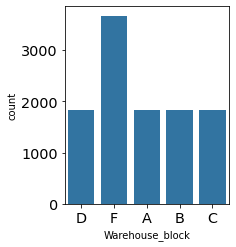

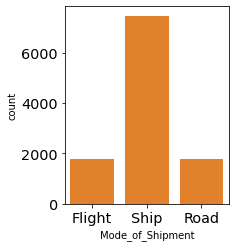

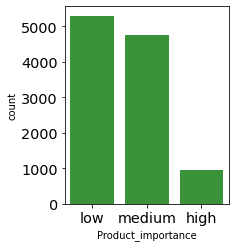

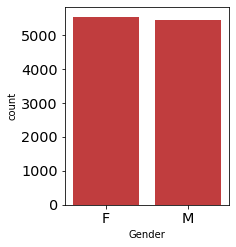

In [16]:
for i in range(0, len(cats)):
    plt.figure(figsize = (10, 8))
    plt.subplot(2, 3, i+1)
    sns.countplot( x= df_ecommerce[cats[i]], data = df_ecommerce, color=pal[i])
    plt.show()

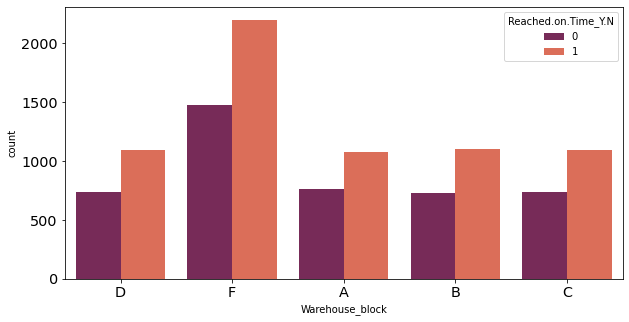

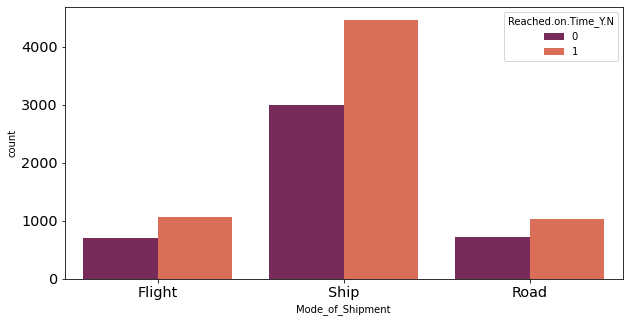

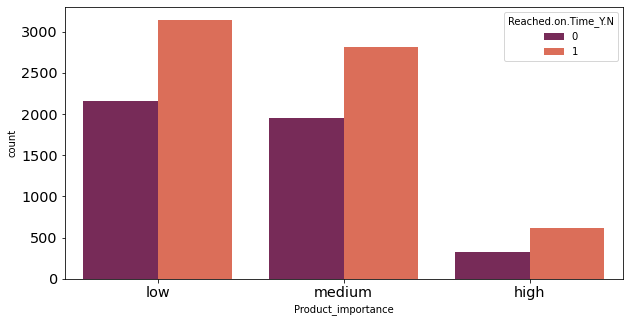

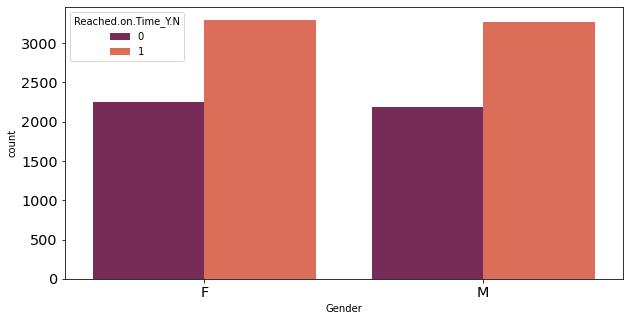

In [50]:
for i in range(0, len(cats)):
    plt.figure(figsize = (10, 5))
    sns.countplot( x= df_ecommerce[cats[i]], hue = 'Reached.on.Time_Y.N', data = df_ecommerce, palette='rocket')
    plt.show()

Dari nilai pada tiap variabel, feature Warheouse Block, Mode of Shipment, Product Importance, dan Gender memiliki ratio yang cenderung sama terhadap target (terlambat/tidak terlambat).

<b> Rekomendasi data pre-processing </b> terhadap feature categorical: <br>
1. Warehouse block dan Mode of Shipment dapat dilakukan pemrosesan One Hot Encoding (OHE) karena data kategorikal tidak bersifat ordinal.
3. Product Importance dan Gender dapat dilakukan pemrosesan Label Encoding karena data kategorikal bersifat ordinal.

## B. Individual Boxplot

digunakan untuk melihat distribusi dan outlier pada kolom numerik

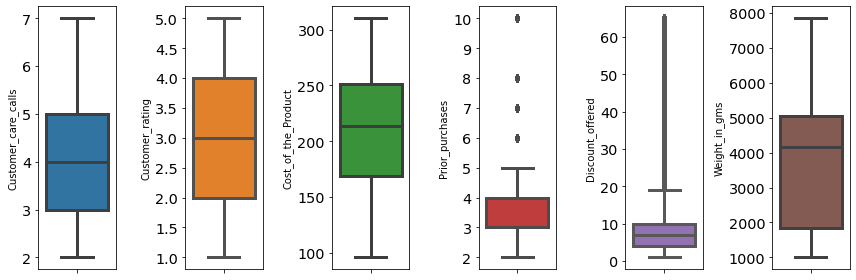

In [18]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_ecommerce[nums[i]], color=pal[i], orient='v')
    plt.tight_layout()

Dari boxplot di atas, terlihat pada box plot <b> discount offered </b> terdapat banyak outlier sehingga perlu dilakukan data pre-processing remove outlier IQR. <br>
Sementara pada boxplot <b> prior purchase </b> terdapat outlier dalam jumlah sedikit (4) sehingga perlu dilakukan data pre-processing remove outlier Z-score (0.3 % data terluar).

## C. Individual Distribution Plot (Numerical)

dilakukan untuk melihat bentuk distribusi dan kemencengan data (skewness)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


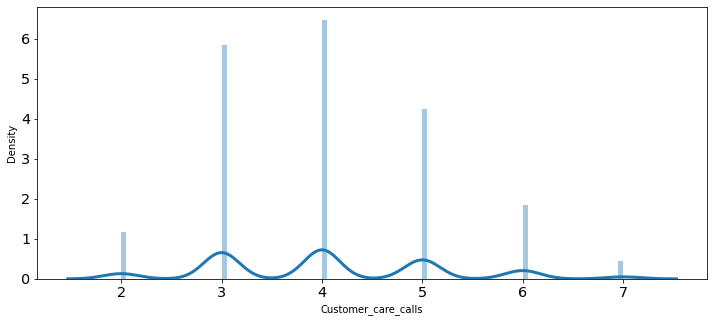

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


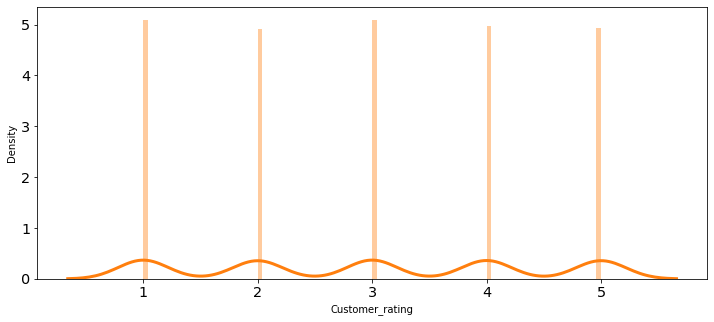

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


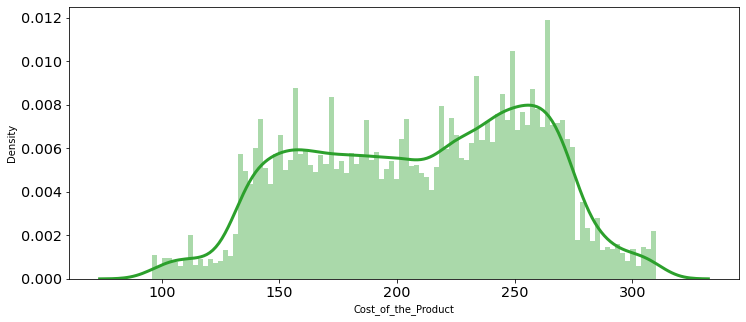

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


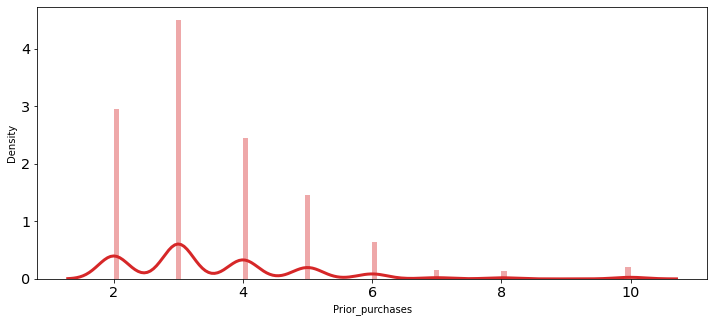

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


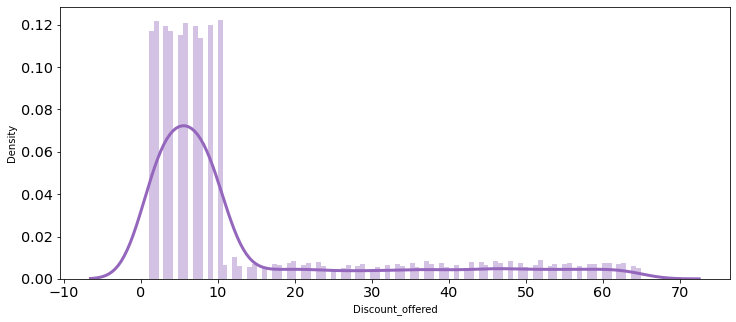

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


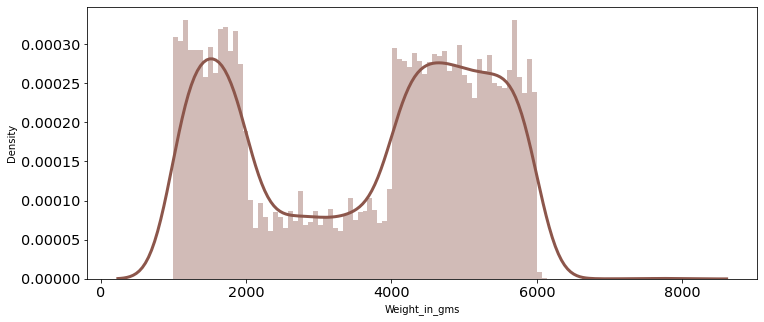

In [19]:
for i in range(0, len(nums)):
    plt.figure(figsize = (12, 5))
    ax = sns.distplot(df_ecommerce[nums[i]], bins = 100, color=pal[i])
    plt.show()

<b> Kesimpulan </b> <br>
1. Terlihat adanya pola distribusi menarik di kolom discount_offered dan weight_in gms, langkah selanjutnya adalah mem-breakdown pola distribusi terbagi menjadi yang late dan tidak late. <br>
2. Pada kolom disocunt offered dan prior purchases terlihat bentuknya positively skewed, agar bisa mendekati distribusi normal bisa menggunakan metode Log Transformation saat data pre-processing.
3. Sementara pada kolom lainnya bisa dilakukan rescalling standardization.

In [20]:
df_ecommlate = df_ecommerce[df_ecommerce['Reached.on.Time_Y.N'] == 1]
df_ecommlate

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10985,10986,F,Ship,5,1,229,5,low,F,10,1040,1
10986,10987,D,Ship,4,5,255,5,medium,M,5,1458,1
10987,10988,F,Ship,5,3,242,5,low,F,10,1846,1
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1


In [21]:
df_ecomm_ontime = df_ecommerce[df_ecommerce['Reached.on.Time_Y.N'] == 0]
df_ecomm_ontime.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3135,3136,B,Road,6,5,141,3,medium,M,8,5031,0
3136,3137,C,Road,3,3,219,3,low,M,4,5956,0
3137,3138,F,Road,4,3,161,3,high,M,7,4245,0
3138,3139,D,Road,4,5,225,4,medium,M,5,4622,0
3140,3141,A,Road,3,3,256,4,medium,M,3,4732,0


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


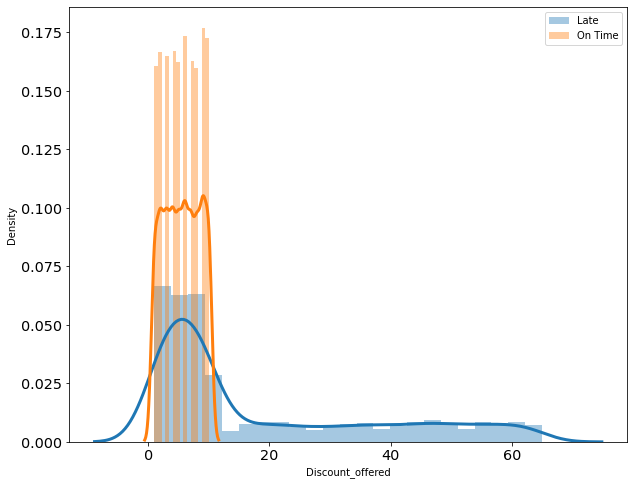

In [34]:
plt.figure(figsize = [10,8])

sns.distplot(df_ecommlate['Discount_offered'], label = 'Late')
sns.distplot(df_ecomm_ontime['Discount_offered'], label = 'On Time')
plt.legend()
plt.show()

Terlihat pada barang yang di-diskon lebih dari 10 persen, banyak pengiriman mengalami keterlambatan.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


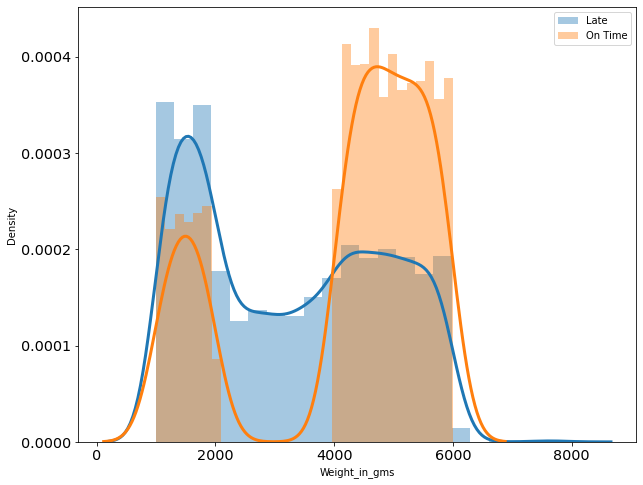

In [35]:
plt.figure(figsize = [10,8])
sns.distplot(df_ecommlate['Weight_in_gms'], label = 'Late')
sns.distplot(df_ecomm_ontime['Weight_in_gms'], label = 'On Time')
plt.legend()
plt.show()

Business insight: Terlihat pada barang dengan berat antara 2-4 kg banyak terjadi pengiriman yang mengalami keterlambatan.

## D. Individual Violin Plots (Numerical)

merupakan gabungan dari boxplot dan distibution plot

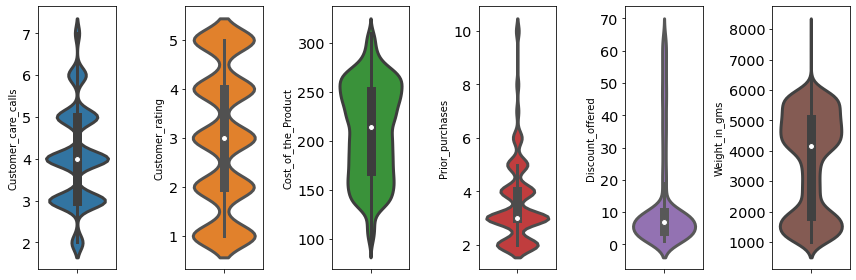

In [33]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df_ecommerce[nums[i]], color=pal[i], orient='v')
    plt.tight_layout()

# 5. Multivariate Analysis

Analisis beberapa kolom sekaligus untuk melihat hubungan antar kolom

## A. Correlation Heatmap

df.corr() akan mengembalikan matriks korelasi <br>
sns.heatmap() membuat heatmap berdasarkan matriks

In [32]:
df_ecommerce.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<AxesSubplot:>

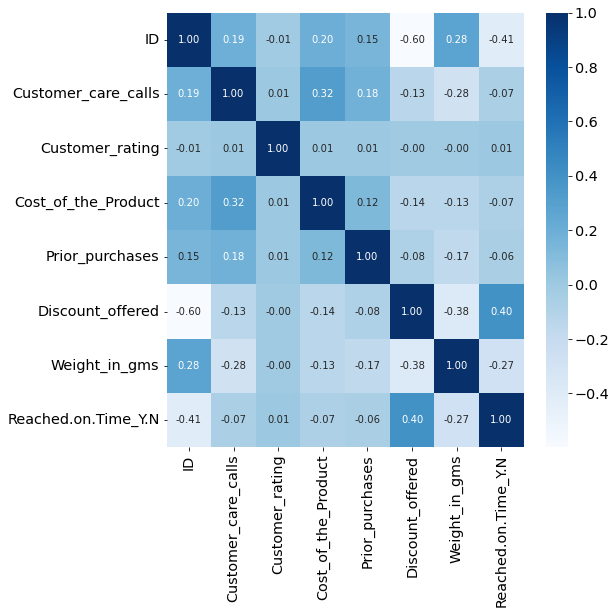

In [36]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_ecommerce.corr(), cmap='Blues', annot=True, fmt='.2f')

<b> Weight dan Discount </b> terlihat memiliki korelasi paling berpengaruh dengan <b> target </b>, dimana nilai r masing-masing adalah 0,40 <br>
<b> Discount Offered </b> dan <b> weights </b> in grams mempunyai korelasi -0.38. <br>
<b> Customer care call </b> dan <b> weights in grams </b> mempunyai korelasi -0.28. <br>
<b> Customer care calls </b> dan <b> cost of the product </b> mempunyai korelasi 0.32.

## B. Pair Plots

sns.pairplot( ) secara otomatis menggambar scatter plot untuk setiap pasangan kolom

<Figure size 1080x1080 with 0 Axes>

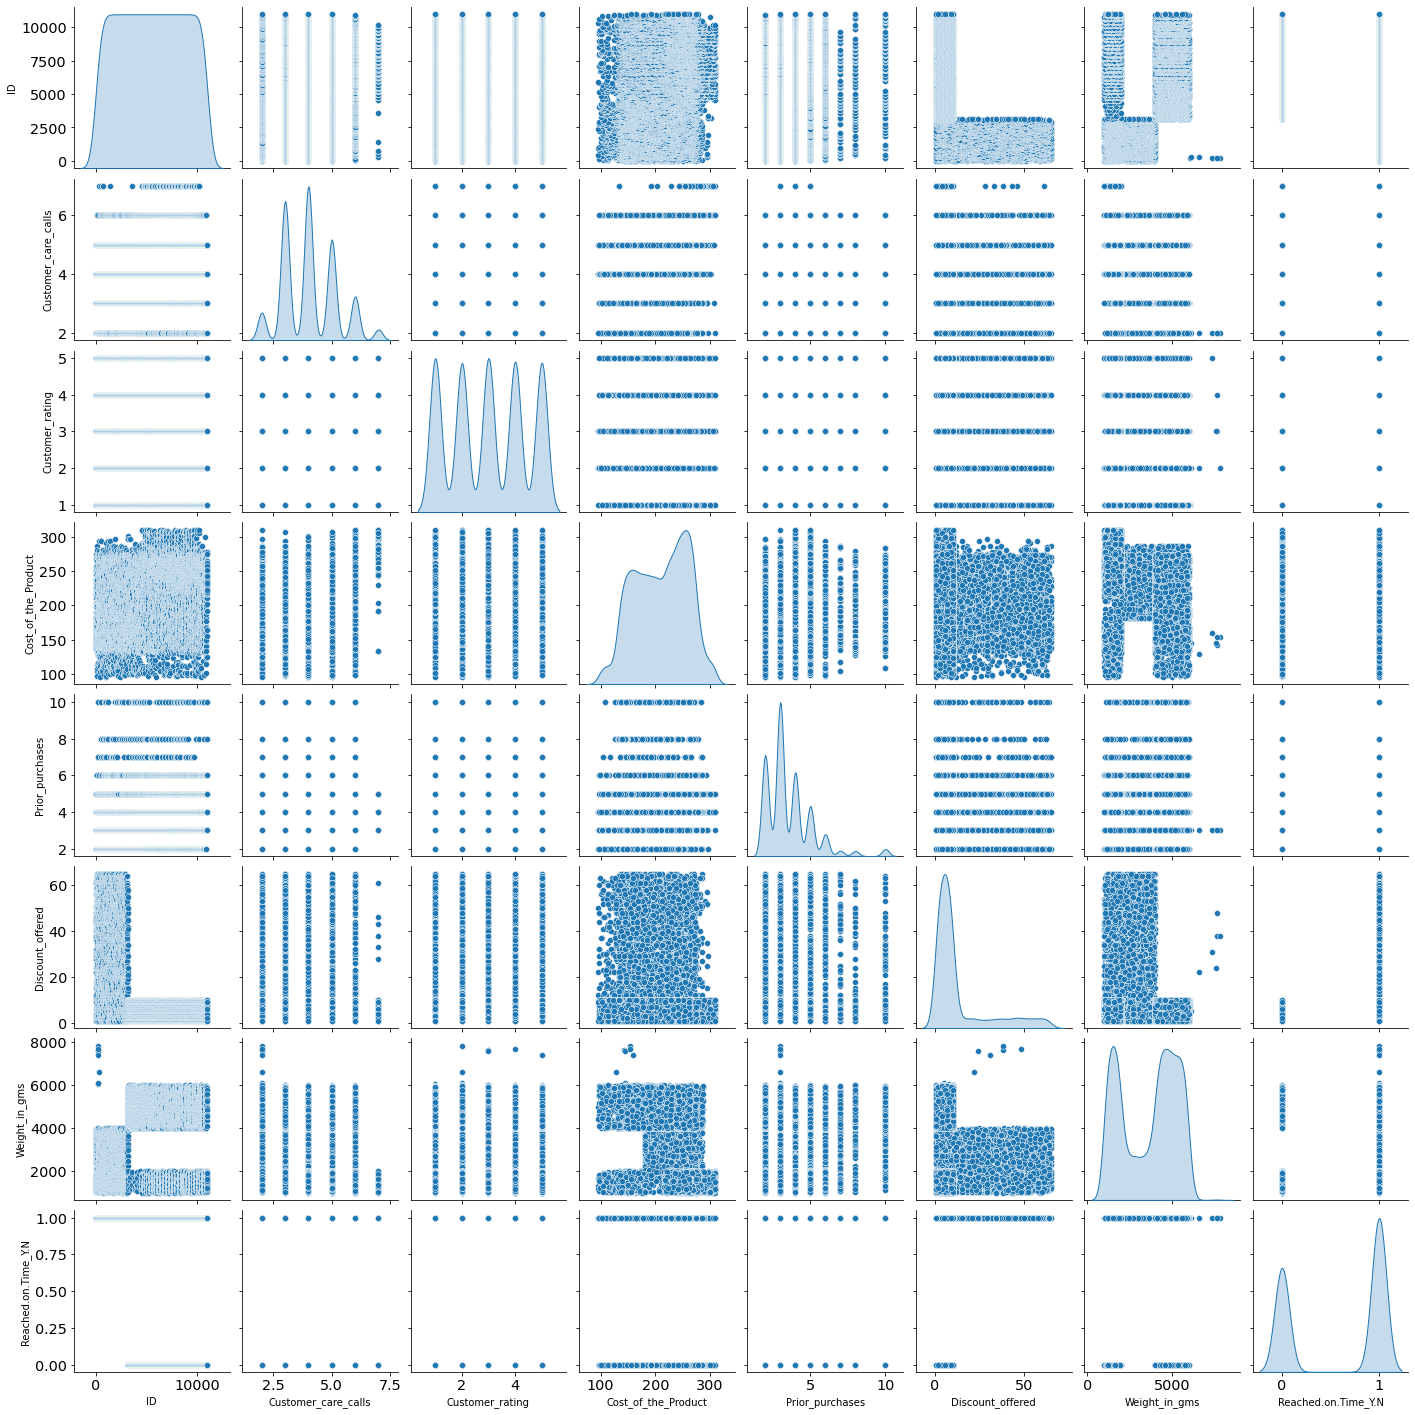

In [37]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_ecommerce, diag_kind='kde')

## C. Category Plots (Categorical - Numerical)

digunakan untuk melihat plot kombinasi kolom numerikal dan kategorikal

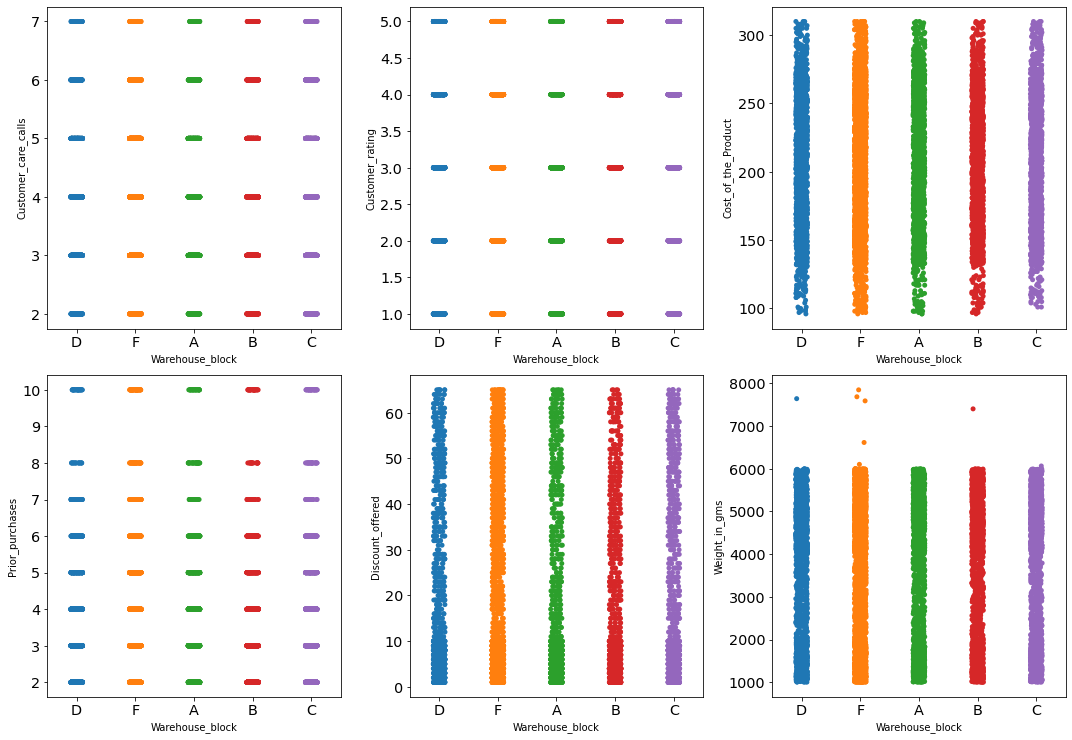

In [38]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df_ecommerce, x='Warehouse_block', y=nums[i])
    plt.tight_layout()

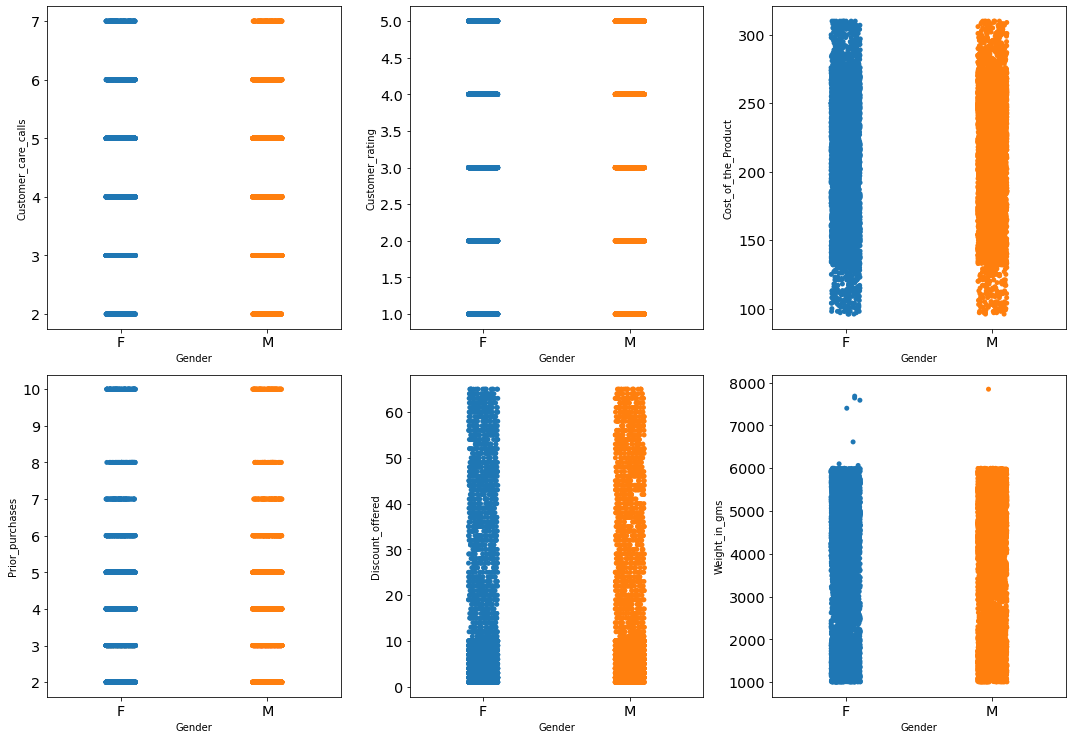

In [39]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df_ecommerce, x='Gender', y=nums[i]) 
    plt.tight_layout()

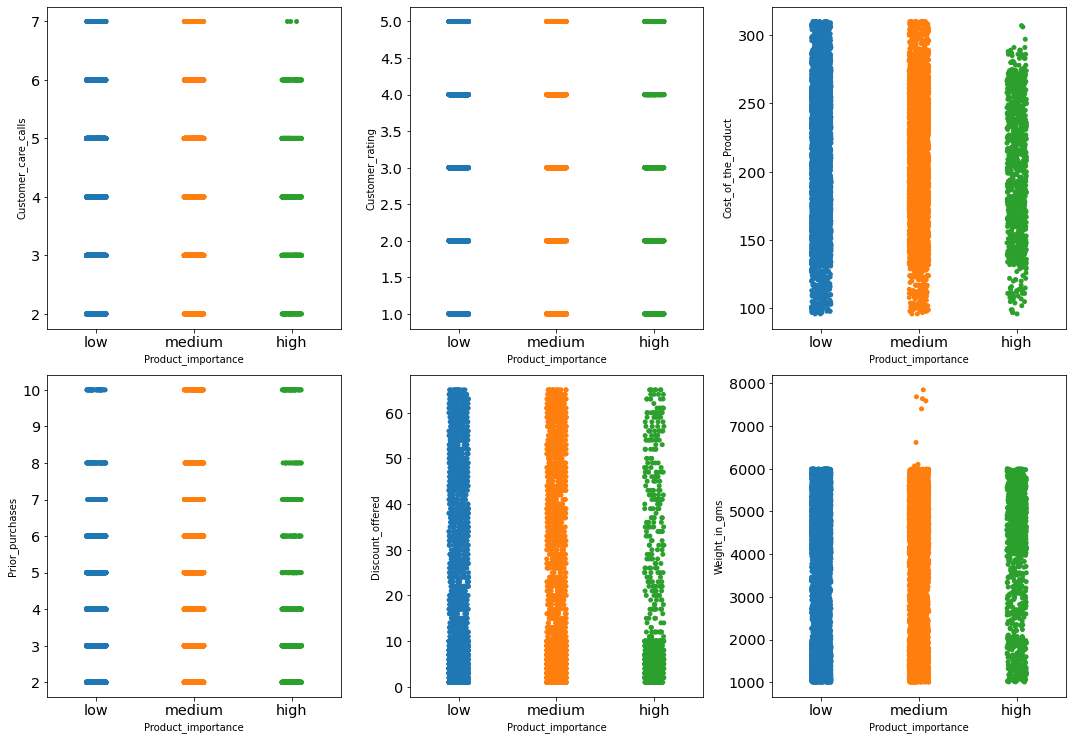

In [40]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=df_ecommerce, x='Product_importance', y=nums[i])
    plt.tight_layout()

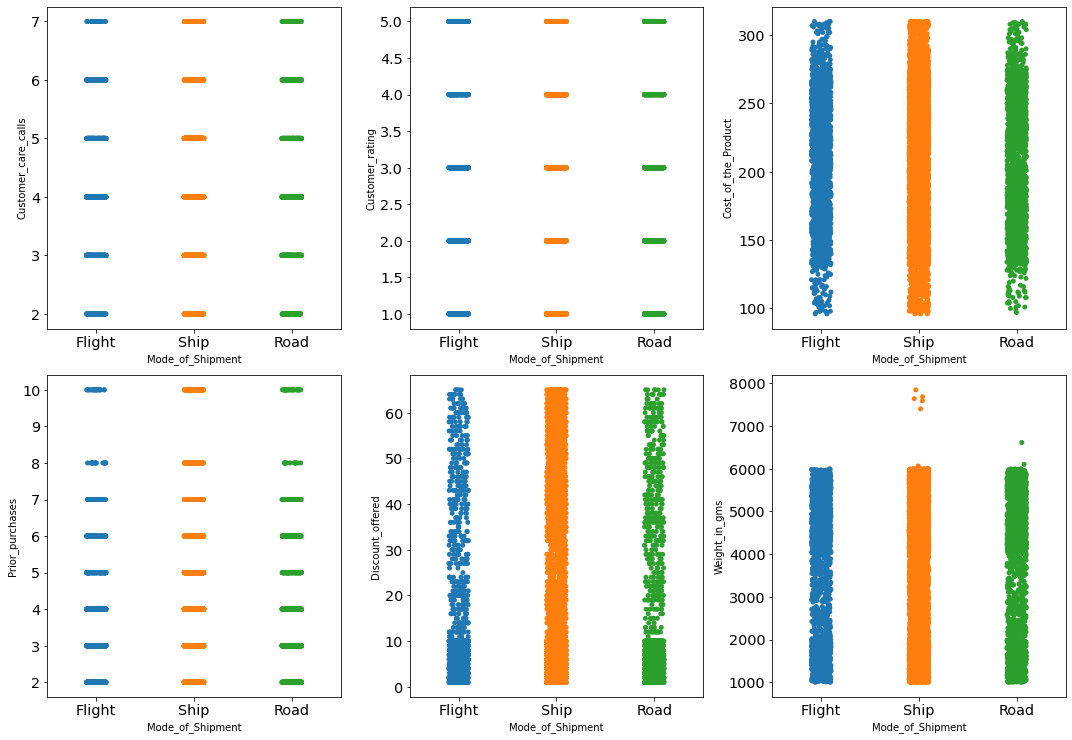

In [41]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=df_ecommerce, x='Mode_of_Shipment', y=nums[i]) 
    plt.tight_layout()

Dari category plot yang sudah dibuat, terlihat tidak adanya korelasi yang kuat antara kolom kategorikal dan numerik.

# 6. Business Insight

## 1. Discount Offered

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


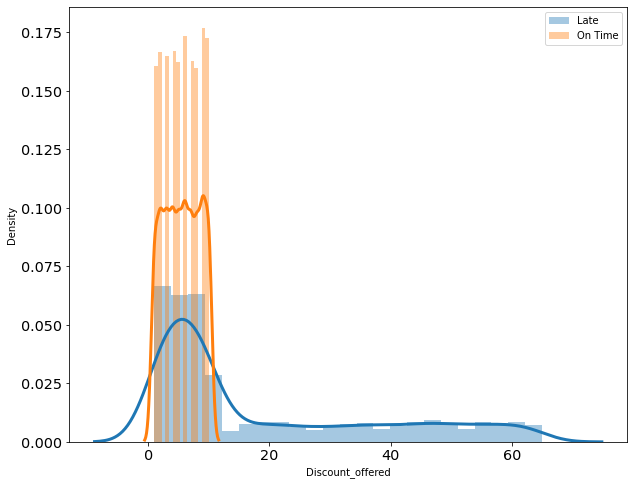

In [43]:
plt.figure(figsize = [10,8])
sns.distplot(df_ecommlate['Discount_offered'], label = 'Late')
sns.distplot(df_ecomm_ontime['Discount_offered'], label = 'On Time')
plt.legend()
plt.show()

In [45]:
df_disc = df_ecommerce.groupby(['Discount_offered']).agg({'ID' : ['count']})
df_disc.head(20)

,ID
,count
Discount_offered,
1,824
2,858
3,840
4,825
5,810
6,849
7,840
8,801


Business insight:
Barang yang diberikan diskon lebih dari 10% cenderung lebih banyak mengalami keterlambatan pengiriman. Hal ini dapat terlihat dari bar berwarna biru yang masih tercatat pada grafik tersebut hingga rentang nilai diskon lebih dari 60%. Menanggapi hal tersebut, perusahaan dapat memberikan notifikasi khusus (potensi keterlambatan pengiriman) jika pelanggan membeli barang dengan diskon 10% lebih, selain itu perusahaan dapat memberikan potongan biaya pengiriman untuk customer yang mengalami keterlambatan pengiriman.

## 2. Weight

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


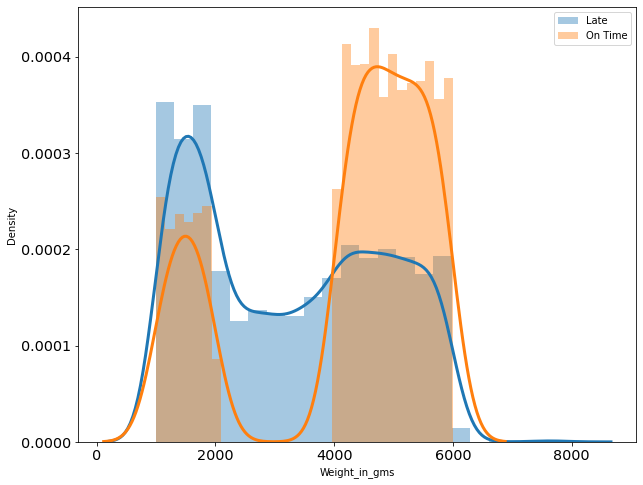

In [46]:
plt.figure(figsize = [10,8])
sns.distplot(df_ecommlate['Weight_in_gms'], label = 'Late')
sns.distplot(df_ecomm_ontime['Weight_in_gms'], label = 'On Time')
plt.legend()
plt.show()

Business insight: Terlihat pada barang dengan berat antara 2-4 kg banyak terjadi pengiriman yang mengalami keterlambatan.Dalam hal ini perusahaan juga bisa memberi notifikasi jika pelanggan membeli barang dengan berat 2-4 kg ada potensi barang akan menglami keterlambatan, serta memberikan potongan harga pada barang di atas 4 kg agar pelanggan bisa lebih tertarik membeli dan tidak terjadi penumpukan barang di gudang pada berat 2-4kg.